In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
from collections import Counter, defaultdict
from functools import partial


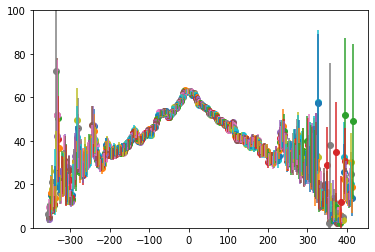

In [2]:
rng = np.random.default_rng(seed=1234)

N = 2048
T = 10000


lengh = defaultdict(partial(np.ndarray, 0, int))

ir = 0
for w in range(N):
    i = 0
    cross = defaultdict(list)
    R = rng.uniform(0,1,T)
    for t in range(T):
        if R[t] < 0.5:
            i += 1
        else:
            i -= 1
        
        cross[i].append(t)

    for i in cross.keys():
        c = np.array(cross[i])
        l = c[1:] - c[0:-1]
        lengh[i] = np.concatenate( (lengh[i], l) )


for i in lengh.keys():
    if lengh[i].size > 0 :
        m = lengh[i].mean()
        n = lengh[i].size
        e = lengh[i].std()/np.sqrt(n-1) if n > 1 else m
        plt.scatter(i, m)
        plt.errorbar(i, m, e )
        
plt.ylim(0, np.sqrt(T))
plt.show()

In [14]:
rng = np.random.default_rng(seed=1234)

a = 1.3
n = 4
Ts = []
while a**n < 30000:
    Ts.append( int(a**n) )
    n += 1
N = 256

lengh = defaultdict(partial(np.ndarray, 0, int))
C = {}

ir = 0
for T in Ts:
    cross = np.zeros(N)
    for w in range(N):
        i = 0
        n = 0
        R = rng.uniform(0,1,T)
        for t in range(T):
            if R[t] < 0.5:
                i += 1
            else:
                i -= 1
            if i == 0:
                n += 1
        cross[w] = n
    C[T] = cross


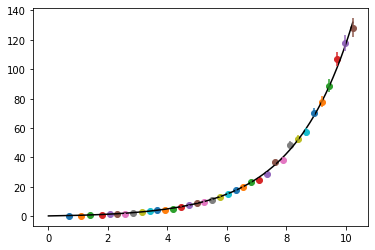

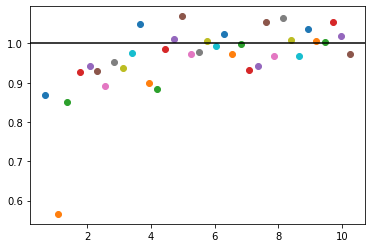

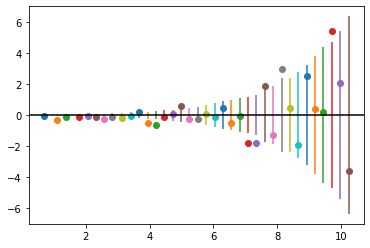

In [31]:
x = np.linspace( 0, np.max(Ts), np.max(Ts)+1 )
f = np.zeros( x.size )
for i in range(1,f.size):
    f[i] = f[i-1] + 1.25 / np.pi * np.arctan(1./np.sqrt(1.*i))

plt.plot(np.log(x[1:]), f[1:]  , 'k')


for T in Ts:
    m = C[T].mean()
    n = C[T].size
    e = C[T].std()/np.sqrt(n-1) if n > 1 else m
    plt.scatter(np.log(T), m)
    plt.errorbar(np.log(T), m, e )
plt.show()

for T in Ts:
    m = C[T].mean()
    n = C[T].size
    e = C[T].std()/np.sqrt(n-1) if n > 1 else m
    plt.scatter(np.log(T), m/f[T])
plt.axhline(1.0, color='k')
plt.show()

for T in Ts:
    m = C[T].mean()
    n = C[T].size
    e = C[T].std()/np.sqrt(n-1) if n > 1 else m
    plt.scatter(np.log(T), m - f[T])
    plt.errorbar(np.log(T), 0, e )
plt.axhline(0.0, color='k')
plt.show()